In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)

n_samples = 20
degrees = [1, 4, 30]

titles = ['Unteranpassung','Optimale Kapazität','Überanpassung']

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))

<Figure size 1008x360 with 0 Axes>

<Figure size 1008x360 with 0 Axes>

No handles with labels found to put in legend.


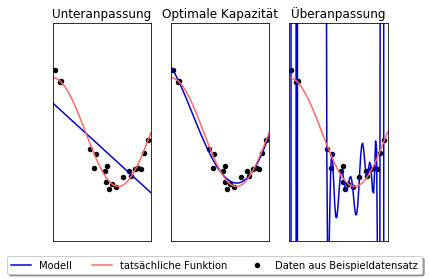

In [23]:
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]),color='mediumblue')
    plt.plot(X_test, true_fun(X_test), color="#FF6666")
    plt.scatter(X, y, color='k', edgecolor='k', s=20)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title(titles[i])

    
plt.figlegend( loc = 'lower center', ncol=5, labelspacing=0. )
plt.figlegend(["Modell","tatsächliche Funktion","Daten aus Beispieldatensatz"],loc = 'lower center', ncol=5, fancybox=True, shadow=True,labelspacing=0. )
plt.grid(True)

fig = plt.gcf()
fig.savefig('test2png.png', dpi=1000,forward=True)
plt.show()